In [102]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [103]:
df = pd.read_pickle('Tagalog_Headlines_EngFeatures')
df

,Statement,Rating,cleaned,cleaned tokenized,period%,comma%,colon%,semicolon%,question mark%,exclamation mark%,dash%,apostrophe%,close parenthesis%,capitalized%,slang words%,curse words%,with numericals%,bigrams,trigrams
0,"Lalaki patay sa pamamaril sa Tondo, Maynila",Real,lalaki patay pamamaril tondo maynila,"[lalaki, patay, pamamaril, tondo, ,, maynila]",0.000000,0.125000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[lalaki patay, patay pamamaril, pamamaril tond...","[lalaki patay pamamaril, patay pamamaril tondo..."
1,"50 Pinoy na naipit sa kaguluhan sa Sudan, nail...",Real,50 pinoy naipit kaguluhan sudan nailikas,"[50, pinoy, naipit, kaguluhan, sudan, ,, naili...",0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909,"[50 pinoy, pinoy naipit, naipit kaguluhan, kag...","[50 pinoy naipit, pinoy naipit kaguluhan, naip..."
2,#BoyingResign: Netizens galit kay DOJ Chief Re...,Real,boyingresign netizens galit kay doj chief remu...,"[#, boyingresign, :, netizens, galit, kay, doj...",0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000,"[boyingresign netizens, netizens galit, galit ...","[boyingresign netizens galit, netizens galit k..."
3,‘Backdoor entry’ ng Grab sa motorcycle taxi pi...,Real,backdoor entry grab motorcycle taxi pilot pina...,"[‘, backdoor, entry, ’, grab, motorcycle, taxi...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[backdoor entry, entry grab, grab motorcycle, ...","[backdoor entry grab, entry grab motorcycle, g..."
4,Doktor nangangamba na na-mild stroke si De Lima,Real,doktor nangangamba mild stroke de,"[doktor, nangangamba, na-mild, stroke, de]",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[doktor nangangamba, nangangamba mild, mild st...","[doktor nangangamba mild, nangangamba mild str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,"Remembering Marky Cielo, Proud Igorot and Star...",Fake,remembering marky cielo proud igorot and stars...,"[remembering, marky, cielo, ,, proud, igorot, ...",0.000000,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[remembering marky, marky cielo, cielo proud, ...","[remembering marky cielo, marky cielo proud, c..."
3448,"Netizen, inilabas ang sekretong galit dahil la...",Fake,netizen inilabas sekretong galit lang my day k...,"[netizen, ,, inilabas, sekretong, galit, lang,...",0.000000,0.055556,0.000000,0.055556,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[netizen inilabas, inilabas sekretong, sekreto...","[netizen inilabas sekretong, inilabas sekreton..."
3449,"Pinoy Vlogger na tumulong kay Nas Daily noon, ...",Fake,pinoy vlogger tumulong kay nas daily nagsalita...,"[pinoy, vlogger, tumulong, kay, nas, daily, ,,...",0.041667,0.083333,0.041667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,"[pinoy vlogger, vlogger tumulong, tumulong kay...","[pinoy vlogger tumulong, vlogger tumulong kay,..."
3450,GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQ...,Fake,grabe unang gabi lamay burol kris aquino dinag...,"[grabe, !, unang, gabi, lamay, burol, kris, aq...",0.050000,0.050000,0.000000,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.850000,0.0,0.0,0.000000,"[grabe unang, unang gabi, gabi lamay, lamay bu...","[grabe unang gabi, unang gabi lamay, gabi lama..."


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating'] = le.fit_transform(df.Rating.values)

In [144]:
sentences = df['Statement'].values
y = df['Rating'].values

In [145]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [146]:
sentences

array(['Lalaki patay sa pamamaril sa Tondo, Maynila',
       '50 Pinoy na naipit sa kaguluhan sa Sudan, nailikas na',
       '#BoyingResign: Netizens galit kay DOJ Chief Remulla matapos mahulihan ng ‘high-grade’ marijuana ang anak',
       ...,
       'Pinoy Vlogger na tumulong kay Nas Daily noon, nagsalita na: Parang ginamit lang ako, naabuso. Hindi ko na sya kilala',
       'GRABE! UNANG GABI NG LAMAY SA BUROL NI KRIS AQUINO DINAGSA NG MGA TAO, KAIBIGAN AT KAMAG-ANAK .',
       ' Isang tattoo artist may walong asawa at magkakasamang naninirahan sa iisang bubong'],
      dtype=object)

In [147]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [148]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)

In [154]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49, stratify=y)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [155]:
X_train

[[7, 572, 3, 33, 445, 2, 3835, 66, 13, 1, 2, 121, 345],
 [795, 24, 565, 2, 2238, 3229, 415, 566, 1698, 1],
 [3179, 3180, 4015, 4, 26, 161, 9, 3725, 4, 2214, 2, 15, 84],
 [150, 1347, 747, 1, 77, 2, 7, 67, 1, 3237, 152],
 [634, 3272, 3, 1, 3, 270, 2, 50, 3083],
 [7, 845, 1, 1287, 4284, 30, 2, 78, 9, 4046],
 [4885,
  415,
  4886,
  211,
  2,
  517,
  30,
  525,
  1,
  3043,
  3044,
  1,
  2007,
  4887,
  628,
  106],
 [92, 1695, 4, 2167, 2, 1696, 2, 39, 3223, 331, 55],
 [1752, 796, 482, 744, 636, 1362, 2, 2, 301, 11, 3274, 2, 226],
 [27, 1557, 1, 2471, 8, 989, 2472, 3631],
 [2915, 916, 1, 254, 636, 3046, 3, 5, 1826, 2852],
 [586,
  220,
  677,
  4,
  12,
  3,
  16,
  631,
  602,
  1343,
  95,
  18,
  1007,
  465,
  91,
  58,
  1078],
 [2070, 2503, 1, 5, 3, 2480, 1, 192, 263, 1242, 1, 212],
 [1, 955, 2, 357, 4, 568, 357, 163, 3, 1135, 3, 2344, 2, 2138],
 [212, 3, 4, 1355, 365, 2008, 314, 19, 1239, 98],
 [7, 583, 403, 11, 3738, 2, 1272, 1, 664, 2, 1943, 4013],
 [243, 227, 1090, 1, 5, 1089, 

In [156]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [157]:
X_train.shape

(2761, 100)

In [158]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec.load('word2vec/word2vec_300dim_20epochs.model')

In [159]:
word2vec_model.wv['lalaki'][:5]

array([-0.33542043, -1.6471791 ,  0.82437915,  0.34260795,  0.5697868 ],
      dtype=float32)

In [160]:
def create_embedding_matrix(model, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, index in word_index.items():
        if word in model.wv.key_to_index:
            embedding_matrix[index] = model.wv[word][:embedding_dim]

    return embedding_matrix

In [161]:
embedding_dim = 300
embedding_matrix = create_embedding_matrix(
    word2vec_model,
    tokenizer.word_index, embedding_dim)

In [162]:
embedding_matrix.shape

(10714, 300)

In [163]:
vocab_size = len(tokenizer.word_index) + 1

In [164]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8388090349075975

In [165]:
from keras.models import Sequential
from keras import layers

In [190]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=True))
model.add(layers.Conv1D(128, 7, activation='tanh'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(24, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 300)          3214200   
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 128)           268928    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,486,249
Trainable params: 3,486,249
Non-trainable params: 0
____________________________________________

Epoch 1/50
173/173 [==============================] - 3s 16ms/step - loss: 0.3659 - accuracy: 0.8345 - val_loss: 0.2530 - val_accuracy: 0.9001
Epoch 2/50
173/173 [==============================] - 2s 14ms/step - loss: 0.1154 - accuracy: 0.9573 - val_loss: 0.2566 - val_accuracy: 0.9016
Epoch 3/50
173/173 [==============================] - 2s 14ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.2683 - val_accuracy: 0.9175
Epoch 4/50
173/173 [==============================] - 2s 14ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.3397 - val_accuracy: 0.9088
Epoch 5/50
173/173 [==============================] - 2s 13ms/step - loss: 8.0659e-04 - accuracy: 0.9996 - val_loss: 0.4061 - val_accuracy: 0.9146
Epoch 6/50
173/173 [==============================] - 2s 10ms/step - loss: 1.1954e-05 - accuracy: 1.0000 - val_loss: 0.6228 - val_accuracy: 0.9146
Epoch 7/50
173/173 [==============================] - 2s 10ms/step - loss: 4.0739e-07 - accuracy: 1.0000 - val_loss: 0.7366 - val_accu

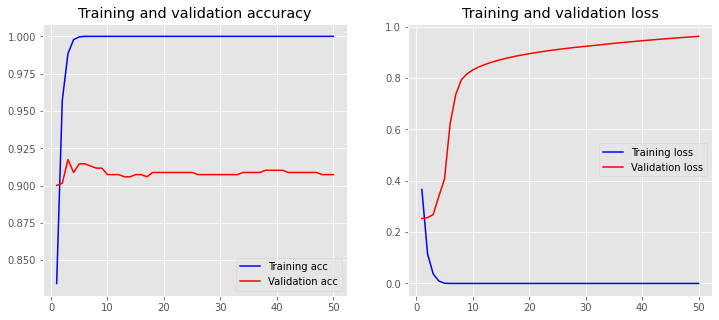

In [191]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# STAMP = f'CNN_Glove_Vectors'
# early_stopping =EarlyStopping(monitor='val_loss', patience=5)
# bst_model_path = STAMP + '.h5'
# model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=16, shuffle=True)


#, callbacks=[early_stopping, model_checkpoint]

#model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [320]:
tf.keras.backend.clear_session()

In [185]:
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(64)))
RNN_model.add(layers.Dense(24, activation='relu'))
RNN_model.add(layers.Dense(1, activation='sigmoid'))
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          3214200   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 24)                3096      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,404,201
Trainable params: 3,404,201
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
87/87 [==============================] - 6s 30ms/step - loss: 0.3845 - accuracy: 0.8156 - val_loss: 0.2659 - val_accuracy: 0.8871
Epoch 2/50
87/87 [==============================] - 2s 19ms/step - loss: 0.1245 - accuracy: 0.9565 - val_loss: 0.2286 - val_accuracy: 0.9190
Epoch 3/50
87/87 [==============================] - 2s 19ms/step - loss: 0.0689 - accuracy: 0.9772 - val_loss: 0.2258 - val_accuracy: 0.9190
Epoch 4/50
87/87 [==============================] - 2s 18ms/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.4316 - val_accuracy: 0.8857
Epoch 5/50
87/87 [==============================] - 2s 19ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.3311 - val_accuracy: 0.9161
Epoch 6/50
87/87 [==============================] - 2s 18ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.3773 - val_accuracy: 0.91320096 - 
Epoch 7/50
87/87 [==============================] - 2s 18ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.4113 - val_accuracy: 0.9247
Epoch 

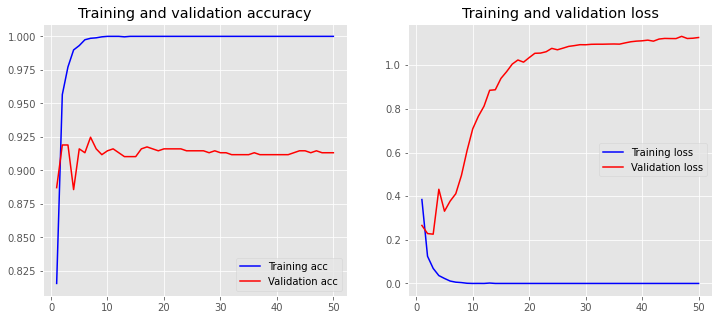

In [186]:
history = RNN_model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [194]:

def create_CNNModel(hl, ol, act, num_filter, kernel_size):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filter, kernel_size, activation=hl))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(24, activation=hl))
    model.add(layers.Dense(1, activation=ol))
    model.compile(optimizer=act,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [195]:
from collections import defaultdict

hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']
num_filters = [32, 64, 128]
kernel_size = [3, 5, 7]
table = defaultdict(list)
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            for l in num_filters:
                for m in kernel_size:

                    table['hl_f'].append(i)
                    table['ol_f'].append(j)
                    table['k_f'].append(k)
                    table['n_filters'].append(l)
                    table['kernel_size'].append(m)

                    

                    model = create_CNNModel(i, j, k, l, m)

                    history = model.fit(X_train, y_train,
                        epochs=20,
                        verbose=False,
                        validation_data=(X_test, y_test),
                        batch_size=32)
                    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

                    table['accuracy'].append(accuracy)
                    table['loss'].append(loss)
                    count = count + 1
                    print(f'model {count}/1125 done, hidden = {i}, output = {j}, optim = {k} || accuracy: {accuracy}')
                    tf.keras.backend.clear_session()
                    with open('accuracies.txt', 'a') as f:
                        f.write('\n'+str(accuracy))


model 1/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.502170741558075
model 2/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.502170741558075
model 3/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.5166425704956055
model 4/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.49782922863960266
model 5/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.502170741558075
model 6/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.6685962080955505
model 7/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.49782922863960266
model 8/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.49782922863960266
model 9/1125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.49782922863960266
model 10/1125 done, hidden = sigmoid, output = sigmoid, optim = RMSprop || accuracy: 0.9059334397315979
mode

In [199]:
def create_RNNModel(hl, ol, act, lstm_size):
    RNN_model = Sequential()
    RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    RNN_model.add(layers.Bidirectional(layers.LSTM(64)))
    RNN_model.add(layers.Dense(lstm_size, activation=hl))
    RNN_model.add(layers.Dense(1, activation=ol))
    RNN_model.compile(optimizer=act,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return RNN_model

In [200]:
hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']
lstm_size = [32, 64, 128]
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            for l in lstm_size:
                count = count+1

print(count)

375


In [201]:
from collections import defaultdict

hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']
lstm_size = [32, 64, 128]


RNN_table = defaultdict(list)
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            for l in lstm_size:
                RNN_table['hl_f'].append(i)
                RNN_table['ol_f'].append(j)
                RNN_table['k_f'].append(k)
                RNN_table['lstm_size'].append(l)          

                model = create_RNNModel(i, j, k, l)

                history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
                loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

                RNN_table['accuracy'].append(accuracy)
                RNN_table['loss'].append(loss)
                count = count + 1
                print(f'model {count}/375 done, hidden = {i}, output = {j}, optim = {k} || accuracy: {accuracy}')
                tf.keras.backend.clear_session()
                with open('RNN_accuracies.txt', 'a') as f:
                    f.write('\n'+str(accuracy))

model 1/375 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.5195369124412537
model 2/375 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.502170741558075
model 3/375 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.502170741558075
model 4/375 done, hidden = sigmoid, output = sigmoid, optim = RMSprop || accuracy: 0.9073805809020996
model 5/375 done, hidden = sigmoid, output = sigmoid, optim = RMSprop || accuracy: 0.916063666343689
model 6/375 done, hidden = sigmoid, output = sigmoid, optim = RMSprop || accuracy: 0.9073805809020996
model 7/375 done, hidden = sigmoid, output = sigmoid, optim = Adam || accuracy: 0.9059334397315979
model 8/375 done, hidden = sigmoid, output = sigmoid, optim = Adam || accuracy: 0.9088277816772461
model 9/375 done, hidden = sigmoid, output = sigmoid, optim = Adam || accuracy: 0.898697555065155
model 10/375 done, hidden = sigmoid, output = sigmoid, optim = Adagrad || accuracy: 0.5094066858291626
mode

In [202]:
df_CNN_res = pd.DataFrame(table)
df_CNN_res

,hl_f,ol_f,k_f,n_filters,kernel_size,accuracy,loss
0,sigmoid,sigmoid,SGD,32,3,0.502171,0.693044
1,sigmoid,sigmoid,SGD,32,5,0.502171,0.692790
2,sigmoid,sigmoid,SGD,32,7,0.516643,0.692992
3,sigmoid,sigmoid,SGD,64,3,0.497829,0.693040
4,sigmoid,sigmoid,SGD,64,5,0.502171,0.692909
...,...,...,...,...,...,...,...
1120,PReLU,PReLU,Adamax,64,5,0.905933,0.308327
1121,PReLU,PReLU,Adamax,64,7,0.888567,0.420891
1122,PReLU,PReLU,Adamax,128,3,0.895803,0.278415
1123,PReLU,PReLU,Adamax,128,5,0.497829,7.745959


In [204]:
df_CNN_res.sort_values('accuracy', ascending=False)

,hl_f,ol_f,k_f,n_filters,kernel_size,accuracy,loss
469,relu,sigmoid,Adam,32,5,0.920405,0.377860
239,tanh,sigmoid,RMSprop,64,7,0.917511,0.862805
472,relu,sigmoid,Adam,64,5,0.917511,0.360863
20,sigmoid,sigmoid,Adam,32,7,0.916064,0.322013
470,relu,sigmoid,Adam,32,7,0.916064,0.362213
...,...,...,...,...,...,...,...
614,relu,LeakyReLU,Adagrad,32,7,0.497829,7.745959
113,sigmoid,relu,Adam,64,7,0.497829,7.745959
620,relu,LeakyReLU,Adagrad,128,7,0.497829,7.745959
80,sigmoid,tanh,Adagrad,128,7,0.497829,7.745959


In [205]:
df_RNN_res = pd.DataFrame(RNN_table)
df_RNN_res

,hl_f,ol_f,k_f,lstm_size,accuracy,loss
0,sigmoid,sigmoid,SGD,32,0.519537,0.691516
1,sigmoid,sigmoid,SGD,64,0.502171,0.692205
2,sigmoid,sigmoid,SGD,128,0.502171,0.693376
3,sigmoid,sigmoid,RMSprop,32,0.907381,1.237076
4,sigmoid,sigmoid,RMSprop,64,0.916064,1.190194
...,...,...,...,...,...,...
370,PReLU,PReLU,Adagrad,64,0.497829,7.745959
371,PReLU,PReLU,Adagrad,128,0.710564,0.602195
372,PReLU,PReLU,Adamax,32,0.903039,0.561781
373,PReLU,PReLU,Adamax,64,0.907381,0.484241


In [206]:
df_RNN_res.sort_values('accuracy', ascending= False)

,hl_f,ol_f,k_f,lstm_size,accuracy,loss
156,relu,sigmoid,Adam,32,0.917511,0.551390
304,PReLU,sigmoid,RMSprop,64,0.917511,1.183042
4,sigmoid,sigmoid,RMSprop,64,0.916064,1.190194
79,tanh,sigmoid,RMSprop,64,0.916064,1.042169
353,PReLU,LeakyReLU,Adam,128,0.914617,0.627071
...,...,...,...,...,...,...
65,sigmoid,PReLU,RMSprop,128,0.497829,7.745959
67,sigmoid,PReLU,Adam,64,0.497829,7.745959
68,sigmoid,PReLU,Adam,128,0.497829,7.745959
69,sigmoid,PReLU,Adagrad,32,0.497829,7.745959


In [405]:
df_RNN_res.to_csv('RNN_Experimentation_ENGLISH.csv')

In [ ]:
#BEST CNN MODEL

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 300)          3214200   
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 32)            48032     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 24)                792       
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,263,049
Trainable params: 3,263,049
Non-trainable params: 0
____________________________________________

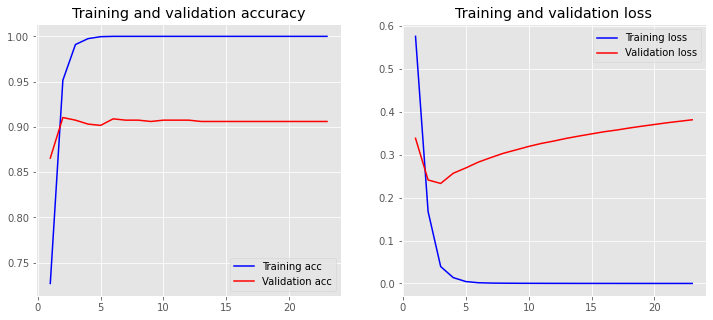

In [213]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=True))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = f'Tagalog_CNN_Vectors'
early_stopping =EarlyStopping(monitor='val_loss', patience=20)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32, shuffle=True, callbacks=[early_stopping, model_checkpoint])


#, 

model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [212]:
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(64)))
RNN_model.add(layers.Dense(24, activation='relu'))
RNN_model.add(layers.Dense(1, activation='sigmoid'))
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 300)          3214200   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dense_10 (Dense)            (None, 24)                3096      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,404,201
Trainable params: 3,404,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


KeyboardInterrupt: 

In [428]:

tokenizer = Tokenizer(num_words=5000, char_level=True)
tokenizer.fit_on_texts(sentences)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train.shape

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)
vocab_size = len(tokenizer.word_index) + 1
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='tanh'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='tanh'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='RMSProp',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          8200      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

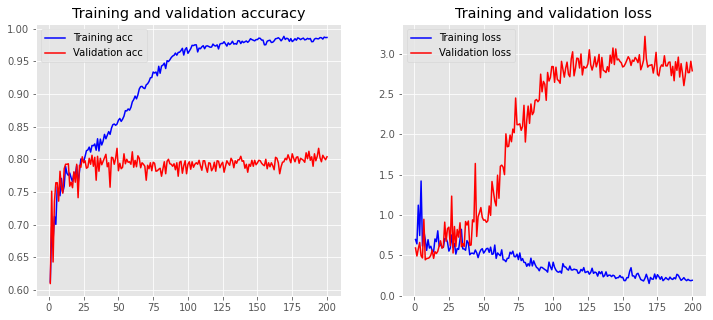

In [429]:
tf.keras.backend.clear_session()
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
RNN_model.add(layers.Bidirectional(layers.LSTM(32)))
RNN_model.add(layers.Dense(64, activation='relu'))
RNN_model.add(layers.Dropout(0.5))
RNN_model.add(layers.Dense(1))
opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)
RNN_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          8200      
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              731136    
 nal)                                                            
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 805,129
Trainable params: 805,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
328/328 [==============================] - 11s 23ms/step - loss: 3.1660 - accuracy: 0.5827 - val_loss

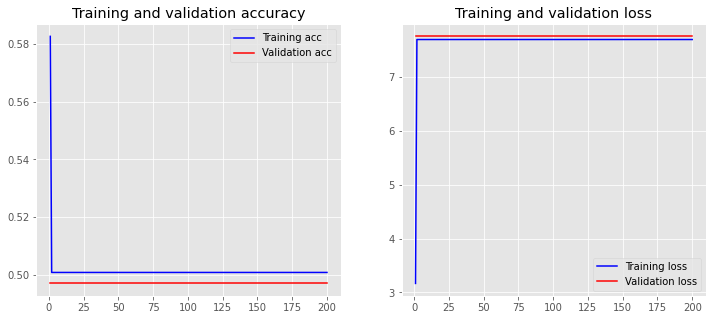

In [424]:
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(256)))
RNN_model.add(layers.Dense(128, activation='relu'))
RNN_model.add(layers.Dense(1, activation='tanh'))
opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=16)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)